In [1]:
from train_config import ModelHandler
import torch
import torch.nn as nn
import mlflow.pytorch
import mlflow
import os
import tiktoken
import numpy as np
import torch.nn.functional as F
from tqdm import tqdm

enc = tiktoken.get_encoding("gpt2")


logged_model = 'runs:/e6c3f9464f1b4701a2251468046a482b/nanogpt_180'
nanoGPT = mlflow.pytorch.load_model(logged_model, map_location=torch.device('cpu'))
nanoGPT = nanoGPT.to('cpu')

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
vocab_tc = nanoGPT.sequence_encoder.vocabolary_enconding_tc.weight
vocab_tc = vocab_tc.detach().numpy()
vocab_tc.shape

(50256, 36)

0th head
1th head
2th head
3th head
4th head
5th head
6th head
7th head
8th head
9th head
10th head
11th head


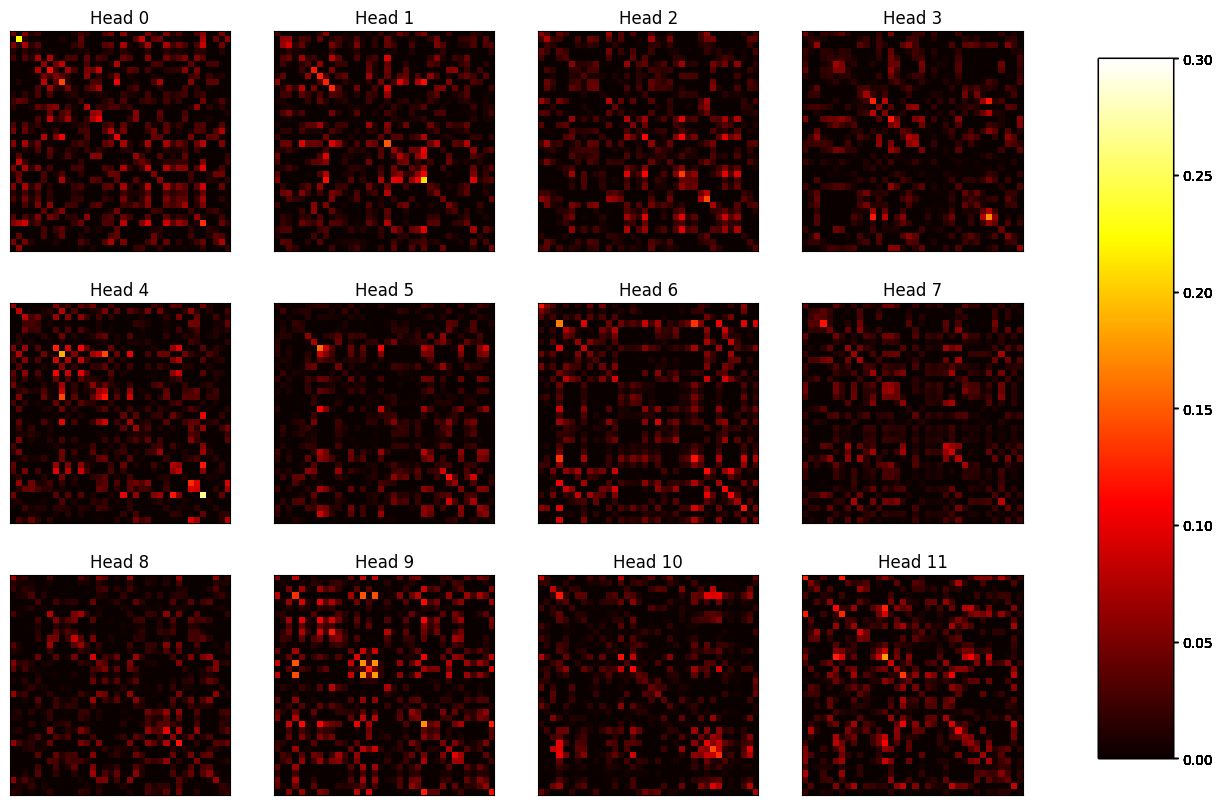

In [48]:
import matplotlib.pyplot as plt
M = nanoGPT.transformer_blocks[0].self_attention._get_metric()
# plt of all  12 M side by side
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
for i in range(3):
    for j in range(4):
        print(f"{i*4+j}th head")


        # eucledian norm to each 
        H = M[i*4+j][0].detach().numpy()
        # H = H / np.linalg.norm(H, axis=0)



        axs[i, j].imshow(H)
        axs[i, j].set_title(f"Head {i*4+j}")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        # the possible cmap values are here:
        # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        fig.colorbar(axs[i, j].imshow(H, cmap="hot", vmin=0, vmax=0.3), cax=cbar_ax)


fig.subplots_adjust(right=0.8)

plt.show()


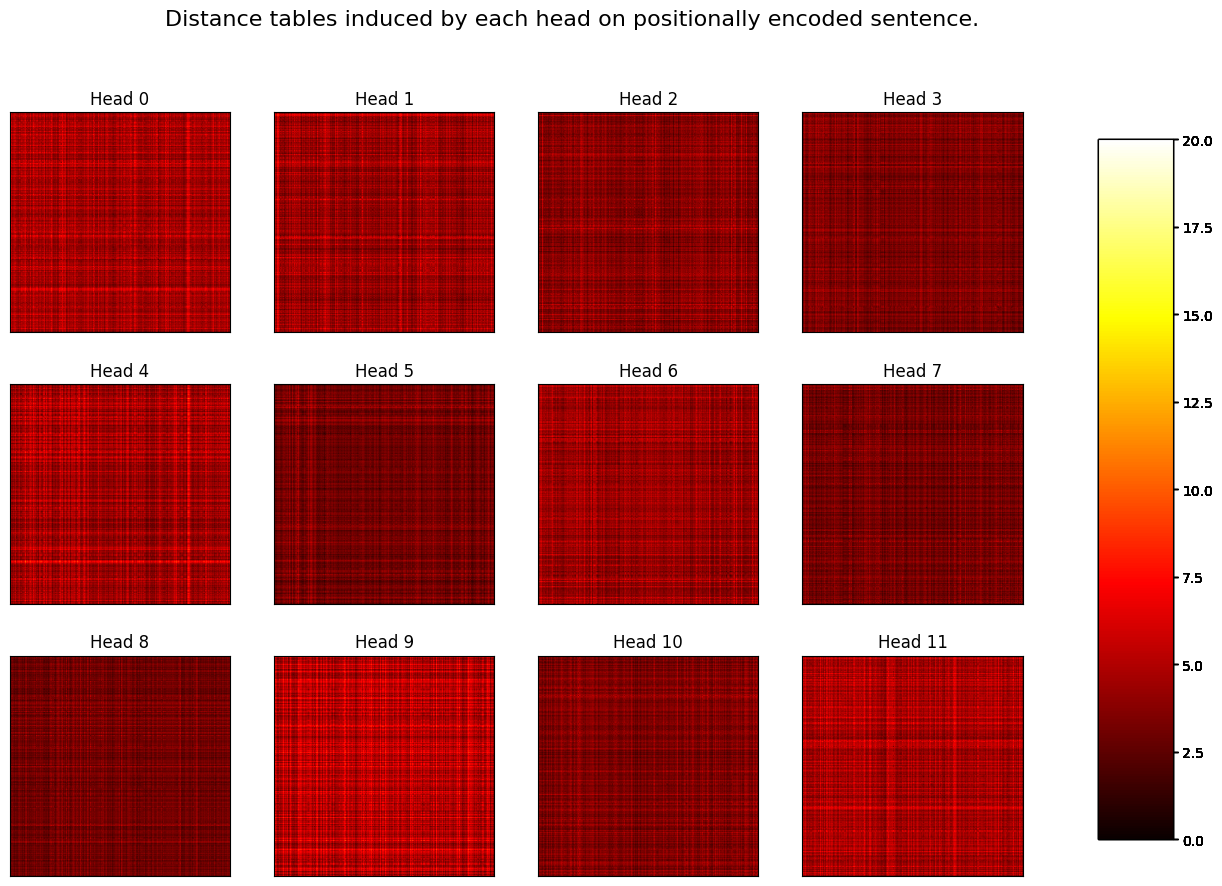

In [95]:
import matplotlib.pyplot as plt
M = nanoGPT.transformer_blocks[0].self_attention._get_metric()
# plt of all  12 M side by side
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
lim_vocab_tc = vocab_tc[1000:1500]
sequence_s = "The meaning of life is"
sequence_s = enc.encode(sequence_s)







sequence_s = "To be or not to be, that is the question of life and death. " 
sequence_s = enc.encode(sequence_s)
sequence_1s = torch.tensor([sequence_s], dtype=torch.long, device='cpu')
sequence_1sc = nanoGPT.sequence_encoder(sequence_1s)
sequence_sc = sequence_1sc[0]
sequence_sc = sequence_sc.detach().numpy()



sequence_sc = vocab_tc[1000:3000]



for i in range(3):
    for j in range(4):
        # allocate a matrix of zeros


        # eucledian norm to each 
        H_cc = M[i*4+j][0].detach().numpy()
        # H = H / np.linalg.norm(H, axis=0)
        # dot = sequence_sc @ H_cc @ sequence_sc.T
        diffs = np.zeros((len(sequence_sc), len(sequence_sc)))

        for a in range(len(sequence_sc)):
            for b in range(len(sequence_sc)):

                diff = sequence_sc[a] - sequence_sc[b]
                diffs[a][b] = diff @ H_cc @ diff.T




        axs[i, j].set_title(f"Head {i*4+j}")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        # the possible cmap values are here:
        # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        fig.colorbar(axs[i, j].imshow(diffs, cmap="hot", vmin = 0, vmax = 20), cax=cbar_ax)

        # colorbar

fig.subplots_adjust(right=0.8)
fig.suptitle("Distance tables induced by each head on positionally encoded sentence.", fontsize=16)
plt.show()


In [54]:
lim_vocab_tc = vocab_tc[:1000]
lim_vocab_tc @ H  @ lim_vocab_tc.T

array([[ 7.818568  , -1.185354  ,  1.837209  , ...,  5.7448435 ,
         6.492992  , -0.6308167 ],
       [-1.185354  ,  0.79505646, -0.6345665 , ..., -1.9645543 ,
        -1.8525324 ,  0.2698542 ],
       [ 1.8372087 , -0.6345669 ,  0.9830091 , ...,  1.9997674 ,
         1.6918176 , -0.7363839 ],
       ...,
       [ 5.744842  , -1.9645553 ,  1.999767  , ...,  6.1655097 ,
         6.2970614 , -0.79726356],
       [ 6.492992  , -1.852532  ,  1.6918182 , ...,  6.297061  ,
         6.9442983 , -0.29514682],
       [-0.6308164 ,  0.26985398, -0.73638386, ..., -0.7972632 ,
        -0.29514706,  0.78805757]], dtype=float32)

In [58]:
lim_vocab_tc[1]

array([ 1.9754692 , -1.1788932 , -1.7349057 , -0.01179812, -0.9254606 ,
       -1.9258517 ,  0.8699781 , -0.51071554,  1.2132509 ,  1.4888997 ,
       -0.11536882,  0.37832332, -0.6808286 , -0.04171786, -2.1295984 ,
        1.1045709 , -0.68290377,  0.13783573, -0.90650266, -0.63939744,
       -1.7581267 ,  1.1584997 ,  0.30451033,  0.24475196,  0.33779442,
       -0.90310526, -0.6067195 , -0.06080671, -0.9406657 , -0.18366663,
       -0.1397063 , -0.6001486 , -0.6516594 , -0.04797991,  0.92413974,
       -0.33479187], dtype=float32)